<a href="https://colab.research.google.com/github/niedakaito/EU_M_Math/blob/main/Chap03_Cm_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chap03_Cm-02-01

In [1]:
mkdir chap3

In [2]:
ls

chap3/  sample_data/


In [3]:
cd /content/chap3/

/content/chap3


In [4]:
import requests, zipfile
from io import StringIO
import io

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'
r = requests.get(url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [6]:
import pandas as pd

student_data_math = pd.read_csv('student-mat.csv', sep=';')
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [53]:
import numpy as np

man_data_math = student_data_math[student_data_math['sex'] == 'M']
female_data_math = student_data_math[student_data_math['sex'] == 'F']

man_sorted_data_math = man_data_math.sort_values(by = 'G1', ascending=True)
female_sorted_data_math = female_data_math.sort_values(by = 'G1', ascending=True)


man_data_math_y = np.cumsum(man_sorted_data_math['G1']) / np.sum(man_sorted_data_math['G1'])
female_data_math_y = np.cumsum(female_sorted_data_math['G1']) / np.sum(female_sorted_data_math['G1'])


man_data_math_N = np.arange(1, len(man_data_math)+1)
female_data_math_N = np.arange(1, len(female_data_math)+1)

man_data_math_cumsum = np.cumsum(man_data_math_N)
female_data_math_cumsum = np.cumsum(female_data_math_N)

man_data_math_ratio = man_data_math_cumsum / man_data_math_cumsum[-1]
female_data_math_ratio = female_data_math_cumsum / female_data_math_cumsum[-1]

man_data_math_x = man_data_math_ratio
female_data_math_x = female_data_math_ratio

2100


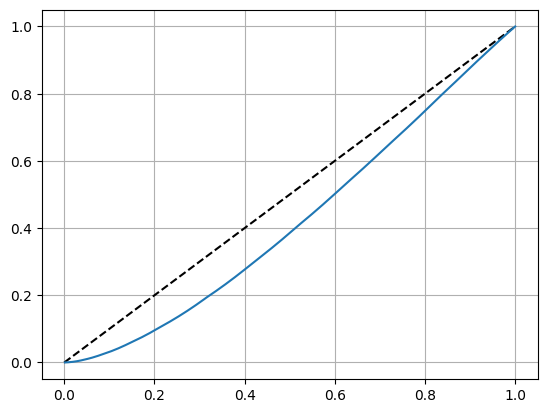

In [43]:
import matplotlib.pyplot as plt

plt.plot([0, 1], [0, 1], color='k', linestyle='--')
plt.plot(man_data_math_y, man_data_math_x)
plt.grid(True)

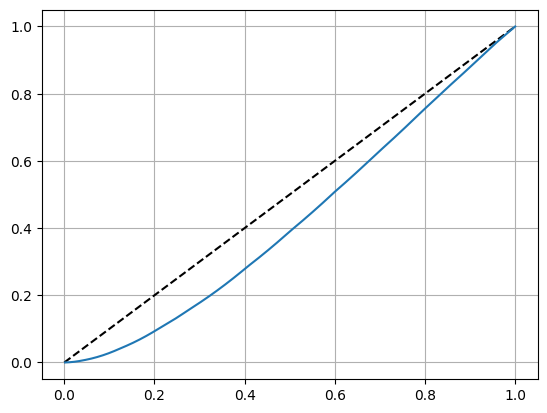

In [56]:
plt.plot([0, 1], [0, 1], color='k', linestyle='--')
plt.plot(female_data_math_y, female_data_math_x)
plt.grid(True)

# Chap03_Cm-02-02

In [60]:
man_data_math_distance = man_data_math_ratio - np.linspace(0, 1, len(man_data_math))
female_data_math_distance = female_data_math_ratio - np.linspace(0, 1, len(female_data_math))

man_data_math_MAD = np.mean(np.abs(man_data_math_distance))
female_data_math_MAD = np.mean(np.abs(female_data_math_distance))

man_data_math_mean_x = np.mean(man_sorted_data_math['G1'])
female_data_math_mean_x = np.mean(female_sorted_data_math['G1'])


man_data_math_Gini_MAD = 2 * man_data_math_MAD / man_data_math_mean_x
female_data_math_Gini_MAD = 2 * female_data_math_MAD / female_data_math_mean_x


print("ジニ係数（男性）:", man_data_math_Gini_MAD)
print("ジニ係数（女性）:", female_data_math_Gini_MAD)

ジニ係数（男性）: 0.029047727408177983
ジニ係数（女性）: 0.030783243108420004
